In [1]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split

## Data Importing

In [2]:
gold_data=pd.read_csv('gold_price_data_2008_2024.csv')
gold_data.head(10)

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
5,27-09-2008,1315
6,26-09-2008,1301
7,25-09-2008,1312
8,24-09-2008,1299
9,23-09-2008,1310


## Data Cleaning

In [3]:
gold_data.isna().sum()

Date          0
Gold Price    0
dtype: int64

In [4]:
gold_data.shape

(5667, 2)

In [5]:
gold_data.dtypes

Date          object
Gold Price     int64
dtype: object

In [6]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d-%m-%Y')
gold_data['Dates'] = gold_data['Date'].dt.day
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Year'] = gold_data['Date'].dt.year
print(gold_data)

           Date  Gold Price  Dates  Month  Year
0    2008-08-31        1190     31      8  2008
1    2008-08-30        1188     30      8  2008
2    2008-08-29        1186     29      8  2008
3    2008-09-30        1350     30      9  2008
4    2008-09-29        1317     29      9  2008
...         ...         ...    ...    ...   ...
5662 2024-05-03        7039      3      5  2024
5663 2024-05-02        7069      2      5  2024
5664 2024-05-01        7047      1      5  2024
5665 2024-06-02        7205      2      6  2024
5666 2024-06-01        7205      1      6  2024

[5667 rows x 5 columns]


In [7]:
train_size = int(len(gold_data) * 0.8)
train_data, test_data = gold_data[:train_size], gold_data[train_size:]

In [8]:
train_data

,Date,Gold Price,Dates,Month,Year
0,2008-08-31,1190,31,8,2008
1,2008-08-30,1188,30,8,2008
2,2008-08-29,1186,29,8,2008
3,2008-09-30,1350,30,9,2008
4,2008-09-29,1317,29,9,2008
...,...,...,...,...,...
4528,2021-04-10,4661,10,4,2021
4529,2021-04-09,4664,9,4,2021
4530,2021-04-08,4687,8,4,2021
4531,2021-04-07,4638,7,4,2021


## Data Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

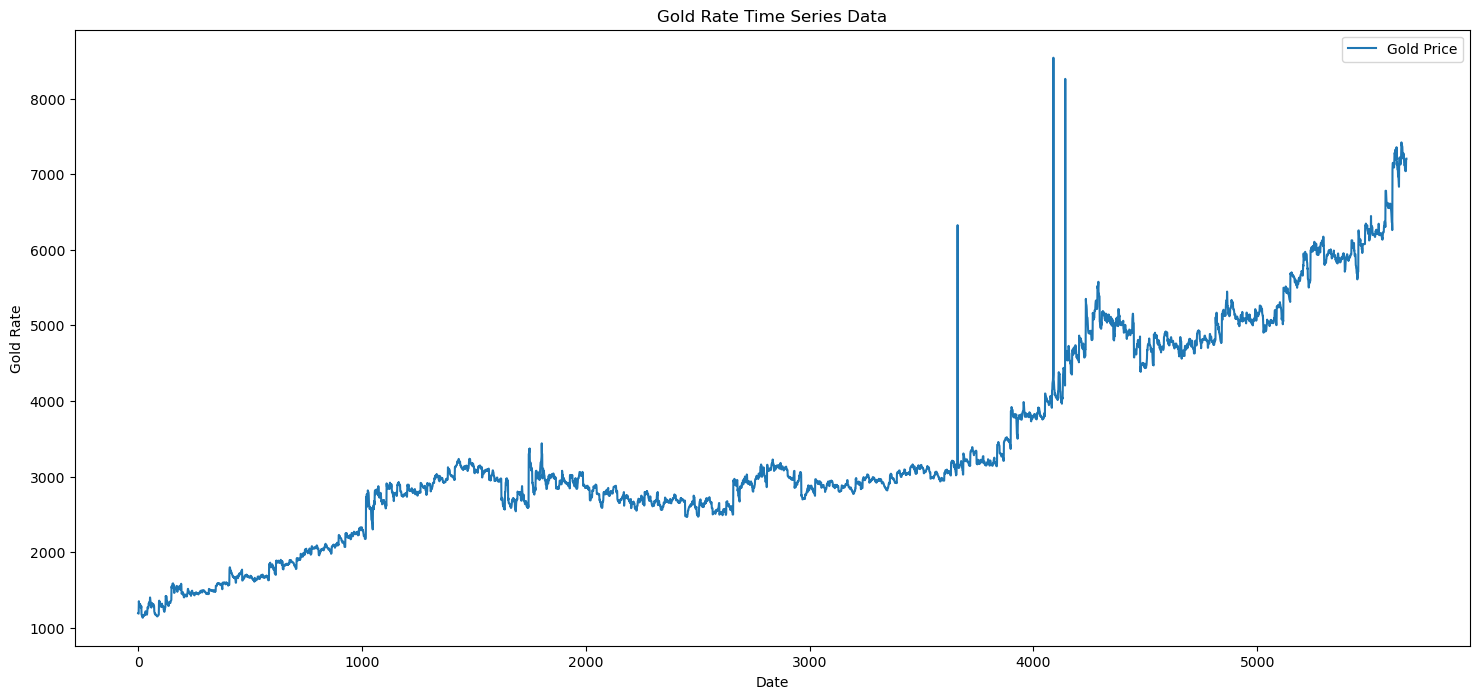

In [10]:
plt.figure(figsize=(18,8))
plt.plot(gold_data.index,gold_data['Gold Price'],label='Gold Price')
plt.title('Gold Rate Time Series Data')
plt.xlabel('Date')
plt.ylabel('Gold Rate')
plt.legend()
plt.show()

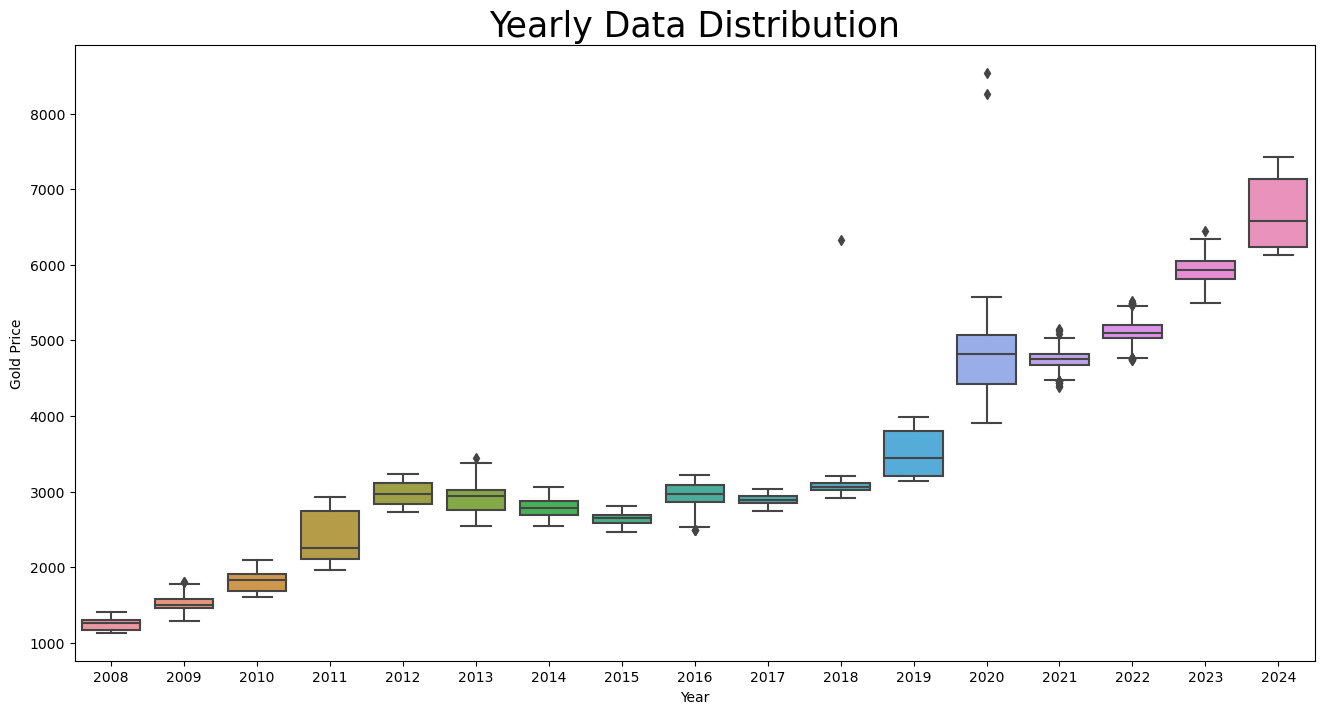

In [11]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Year',y='Gold Price',data=gold_data)
plt.title('Yearly Data Distribution',size=25)
plt.show()

In [12]:
mean_rate=gold_data['Gold Price'].mean()
variance_rate=gold_data['Gold Price'].var()
print(f"Mean:{mean_rate}")
print(f"Variance:{variance_rate}")

Mean:3391.382918651844
Variance:1823444.9567713612


In [13]:
import statsmodels.tsa.stattools as smt

def check_stationarity(series, title='Time Series'):
    result = smt.adfuller(series)
    print(f'{title} ADF Statistic: {result[0]}')
    print(f'{title} p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    if result[1] > 0.05:
        print(f"{title} is not stationary")
    else:
        print(f"{title} is stationary")

# Check stationarity of the training set
check_stationarity(train_data['Gold Price'], title='Train Gold Price')


Train Gold Price ADF Statistic: -0.5429728051306554
Train Gold Price p-value: 0.8833543675852351
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Train Gold Price is not stationary


In [14]:
train_data['Gold difference']=train_data['Gold Price'].diff().dropna()
check_stationarity(train_data['Gold difference'].dropna(),title='Gold Price Difference')

Gold Price Difference ADF Statistic: -20.266147252155676
Gold Price Difference p-value: 0.0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Gold Price Difference is stationary


C:\Users\UTS\AppData\Local\Temp\ipykernel_56948\2999293161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Gold difference']=train_data['Gold Price'].diff().dropna()


## Auto-Correlation(ACF)

<Figure size 1200x500 with 0 Axes>

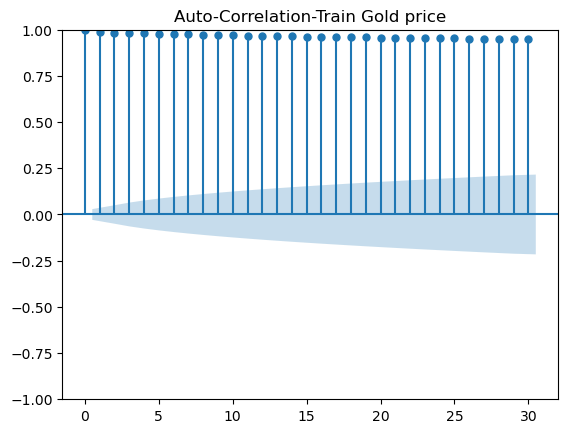

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(12,5))
plot_acf(train_data['Gold Price'],lags=30, title='Auto-Correlation-Train Gold price')
plt.show()

## Partial Auto-Correlation(PACF)

<Figure size 1800x800 with 0 Axes>

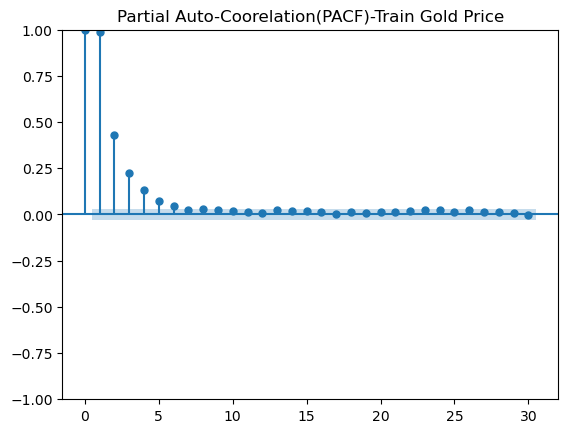

In [16]:
plt.figure(figsize=(18,8))
plot_pacf(train_data['Gold Price'],lags=30,title='Partial Auto-Coorelation(PACF)-Train Gold Price')
plt.show()

## Model Fitting

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [18]:
gold_rate=gold_data['Gold Price']

#fiiting the arima model
order=(7,0,8)
model=ARIMA(gold_rate,order=order)
fitted_model=model.fit()
print(fitted_model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Gold Price   No. Observations:                 5667
Model:                 ARIMA(7, 0, 8)   Log Likelihood              -34716.037
Date:                Tue, 11 Jun 2024   AIC                          69466.073
Time:                        13:09:02   BIC                          69578.994
Sample:                             0   HQIC                         69505.401
                               - 5667                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3391.3847      0.004   8.13e+05      0.000    3391.377    3391.393
ar.L1          0.3192      0.055      5.850      0.000       0.212       0.426
ar.L2          0.7320      0.051     14.216      0.0

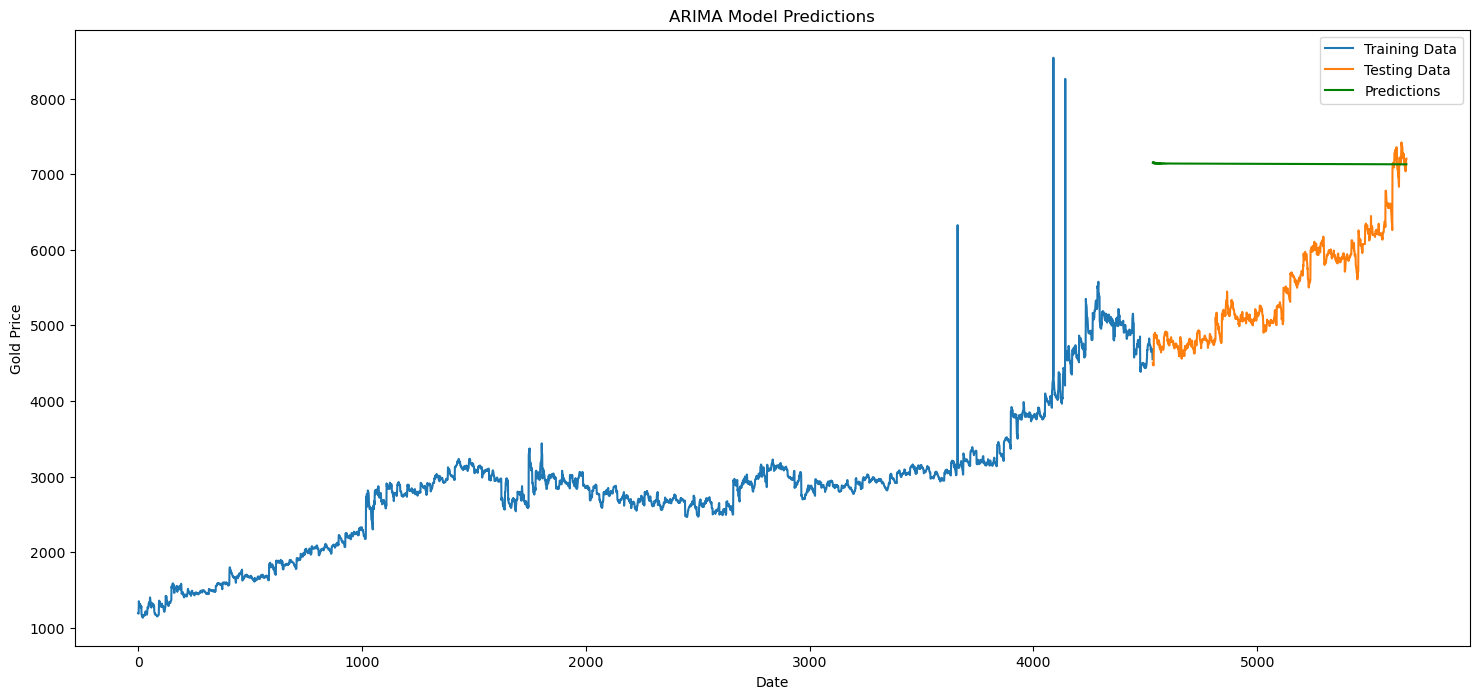

In [19]:
forecast_steps= len(test_data)
forecast = fitted_model.forecast(steps=forecast_steps)

#actual vs predicted
plt.figure(figsize=(18,8))
plt.plot(train_data.index,train_data['Gold Price'],label='Training Data')
plt.plot(test_data.index,test_data['Gold Price'],label='Testing Data')
plt.plot(test_data.index,forecast,color='green',label='Predictions')
plt.title("ARIMA Model Predictions")
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()



In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import numpy as np

In [21]:
# Assuming 'fitted_model' is the fitted ARIMA model object
predictions = fitted_model.forecast(steps=len(test_data))

# Extract only the Gold_Price column for test_data_values
test_data_values = test_data['Gold Price'].values

# Ensure both are numpy arrays and numeric
test_data_values = np.asarray(test_data_values, dtype=float)
predictions = np.asarray(predictions, dtype=float)

# Calculate accuracy metrics
mae = mean_absolute_error(test_data_values, predictions)
mse = mean_squared_error(test_data_values, predictions)
rmse = np.sqrt(mse)
mape=mean_absolute_percentage_error(test_data_values,predictions)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 1639.7984596277204
Mean Squared Error (MSE): 3133013.369493068
Root Mean Squared Error (RMSE): 1770.0320249908102


In [22]:
aic = fitted_model.aic
bic = fitted_model.bic

print("Akaike Information Criterion (AIC):", aic)
print("Bayesian Information Criterion (BIC):", bic)

Akaike Information Criterion (AIC): 69466.07342394722
Bayesian Information Criterion (BIC): 69578.9944816021


In [23]:
print(train_data.shape)
print(predictions.shape)

(4533, 6)
(1134,)


In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(gold_rate, predictions)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


ValueError: operands could not be broadcast together with shapes (5667,) (1134,) 